<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li></ul></div>

# Защита персональных данных клиентов

___
**Описание задачи:**
Страховой компании «Хоть потоп» необходимо защитить данные клиентов, чтобы по ним было сложно восстановить персональную информацию.

**Цель проекта:**
Разработать метод преобразования данных, который не ухудшит качество моделей машинного обучения .

**Описание данных:**
* *Признаки*: пол, возраст и зарплата застрахованного, количество членов его семьи.
* *Целевой признак*: количество страховых выплат клиенту за последние 5 лет.

**Этапы проекта:**

1. Загрузка данных
2. Умножение матриц
3. Алгоритм преобразования.
4. Проверка алгоритма.

**Описание этапов и выполняемых шагов:**
1. *Загрузка данных*
* Изучим и проверим данные на пропуски и дубликаты.

2. *Умножение матриц:*
* Измерим качество линейной регрессии для матрицы признаков `Х`.
* Проверим ее на обратимость.
* Умножим матрицу `X` на квадратную обратимую матрицу `XP`
* Проверим качество линейной регрессии для матрицы `XP`
* Приведем математическое обоснование выбранного метода преобразования, докажем, что он не повлияет на предсказания модели.

3. *Алгоритм преобразования:*
* Опишем сам алгоритм.

4. *Проверка алгоритма:*
* Проверим меняется ли качетсво линейной регрессии.

## Загрузка данных
_______

In [1]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/datasets/insurance.csv')

In [4]:
data.tail()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
4995,0,28.0,35700.0,2,0
4996,0,34.0,52400.0,1,0
4997,0,20.0,33900.0,2,0
4998,1,22.0,32700.0,3,0
4999,1,28.0,40600.0,1,0


In [5]:
data.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


In [6]:
data.dtypes

Пол                    int64
Возраст              float64
Зарплата             float64
Члены семьи            int64
Страховые выплаты      int64
dtype: object

In [7]:
data.isna().sum()

Пол                  0
Возраст              0
Зарплата             0
Члены семьи          0
Страховые выплаты    0
dtype: int64

In [8]:
data.duplicated().sum()

153

**Визуализация данных:**

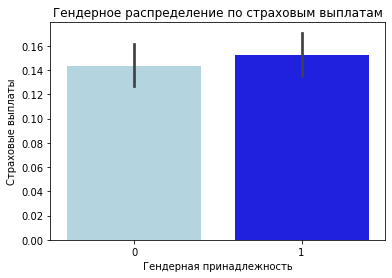

In [9]:
ax = sns.barplot(x='Пол',
            y='Страховые выплаты',
            data=data,
            palette=['lightblue', 'blue'])

ax.set_title('Гендерное распределение по страховым выплатам')
ax.set(xlabel='Гендерная принадлежность', ylabel='Страховые выплаты');

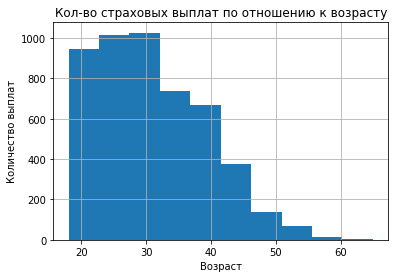

In [10]:
data['Возраст'].hist()
plt.title('Кол-во страховых выплат по отношению к возрасту')
plt.xlabel('Возраст')
plt.ylabel('Количество выплат')
plt.show()

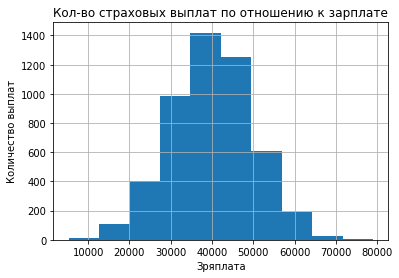

In [11]:
data['Зарплата'].hist()
plt.title('Кол-во страховых выплат по отношению к зарплате')
plt.xlabel('Зряплата')
plt.ylabel('Количество выплат')
plt.show()

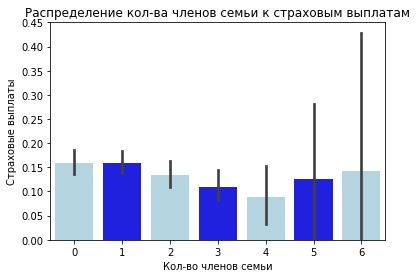

In [12]:
ax = sns.barplot(x='Члены семьи',
            y='Страховые выплаты',
            data=data,
            palette=['lightblue', 'blue'])

ax.set_title('Распределение кол-ва членов семьи к страховым выплатам')
ax.set(xlabel='Кол-во членов семьи', ylabel='Страховые выплаты');

**Вывод:**
_______

Исходя из загруженных данных имеем:
- 5000 строк и 5 столбцов.
- Большое отклонение от среднего значения, что позволяет сказать о высоком разбросе значений в столбцах: `Возраст` и `Зарплата`.
- Данные представлены в двух типах: `int` , `float`
- Пропусков не обнаружено.
- Присутствует 153 повторяющихся строки, но т.к явного идентификатора нет, то избавляться от них не будем. 
_______

## Умножение матриц
_______

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

In [15]:
X = data.drop('Страховые выплаты', axis=1)
y = data['Страховые выплаты'] 

X.shape, y.shape

((5000, 4), (5000,))

**Посмотрим качество линейной регрессии для матрицы признаков `X`:**
_______

In [16]:
def lr_scorer(x, y):
    lr = LinearRegression()
    lr.fit(x, y)
    r2 = lr.score(x, y)
    return r2

In [17]:
lr_scorer(X, y)

0.4249455028666801

**Проверим матрицу на обратимость:**
_______

In [18]:
INV = np.random.rand(4,4)

np.linalg.inv(INV)

array([[-1.45446053,  1.42242972,  0.19396839,  1.21654648],
       [ 0.74509567, -1.16135229, -0.3109811 ,  1.33984783],
       [ 0.80148084,  0.59066129, -0.10860088, -1.07226421],
       [-0.50132689,  0.69106629,  1.23199712, -1.01421829]])

**Проверим качество линейной регрессии для обратимой матрицы признаков `XP`:**
_______

In [19]:
XP = X @ INV
lr_scorer(XP, y)

0.42494550286667987

**Вывод:**
_______

Умножение матрицы признаков `X` на квадратную обратимую матрицу `XP` существенно не изменяет качетсво линейной регрессии.
_______

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

_______

**Обоснование:** 

Для решения этого задания воспользуемся следующими свойствами матриц:
$$
1.  (AB)^{T} = B^TA^T 
$$
$$
2. (AB)^{-1} = B^{-1}A^{-1}
$$
$$
3. (AA)^{-1} = A^{-1}A = E 
$$
$$
4. AE = EA = A
$$


В формулу вектора весов линейной регрессии `w` подставляем произведение `XP` вместо `X`.

Получится выражение для `w’` (вектор весов после преобразования). 

`P` – обратимая квадратная матрица (матрица преобразования). 

Используем вышеприведенные формулы, преобразуем получившееся выражение и получаем зависимость между параметром `w’` (вектор весов после преобразования) и `w` (вектор весов до преобразования). 

Затем в формулу предсказания `а = Xw` подставляем `XP` вместо `Х`, и `w’` вместо `w`.


-----------

Запишем исходное уравнение весов:

$$
w = (X^T X)^{-1} X^T y
$$

Докажем, что при умножении на матрицу имеющую обратную ничего не изменится. Запишем вместо `Х` произведение `Х*Р`, тогда:

$$
w'= ((XP)^T (XP))^{-1} (XP)^T y 
$$

$$
w'= (P^T (X^T X) P)^{-1} X^T P^T y 
$$

$$
w'=P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y
$$

$$ где  P^{T^{-1}}P^{T} = E, тогда \Longrightarrow
$$

$$
w'= P^{-1} (X^T X)^{-1} E X^T y
$$

$$
w'= P^{-1}w 
$$

Cвязь между `w` и `w'` мы нашли, теперь подставим в  `a= Xw` производную, получаем:


$$
a' = XP w'
$$

$$
a' = XP P^{-1} w
$$

$$
a' = XEw
$$

$$
a' = Xw
$$

$$
a' = a
$$

Таким образом мы доказали, что преобразование подобного типа не повлияет на предсказание.

$$
a = Xw = XEw = XPP^{-1}w = (XP)P^{-1}w = (XP)w'
$$

$$
w' = ((XP)^T XP)^{-1} (XP)^T y
$$
$$
w' = (P^T (X^T X) P)^{-1} (XP)^T y
$$
$$
....
$$

## Алгоритм преобразования

-----------

**Алгоритм:**

1. Создаём рандомную матрицу.
2. Проверяем её на обратимость (создаём единичную матрицу).
3. Для шифрования умножаем матрицу признаков `X` на квадратную обратимую матрицу `XP`.
4. Ищем метрики качества на исходных данных и на преобразованных.
5. Делаем вывод.


**Обоснование**

Ранее нами обоснована возможность использования матрицы `P` для шифрования исходной матрицы признаков.

## Проверка алгоритма
__________

In [20]:
np.random.seed(1234)
try:
    XP = np.linalg.inv(np.random.rand(4,4))
except numpy.linalg.LinAlgError:
    pass
else:
    X_new = X @ XP
    
X_new.head()    

,0,1,2,3
0,-624940.350778,-155279.231836,-1.461442e+06,2.401108e+06
1,-478710.504110,-118970.040251,-1.119496e+06,1.839323e+06
2,-264535.777880,-65749.188479,-6.186359e+05,1.016421e+06
3,-525461.644182,-130539.764270,-1.228802e+06,2.018862e+06
4,-328821.954355,-81712.917704,-7.689628e+05,1.263396e+06


In [21]:
lr_scorer(X_new, y)

0.4249455028661606

____
**Вывод:**

Качесто линейной регрессии не поменялось, цель проекта достигнута.
________